<a href="https://colab.research.google.com/github/liizaaa/machine_learning/blob/main/%D0%B2%D1%82%D0%BE%D1%80%D0%B0%D1%8F_%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

In [85]:
data = pd.read_csv("Data_classified_phase.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15388 entries, 0 to 15387
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kpmag      15388 non-null  float64
 1   numax      15388 non-null  float64
 2   e_numax    15388 non-null  float64
 3   Delnu      15388 non-null  float64
 4   e_Delnu    15388 non-null  float64
 5   A          15388 non-null  object 
 6   e_A        15388 non-null  object 
 7   Width      15388 non-null  object 
 8   e_Width    15388 non-null  object 
 9   Teff       15388 non-null  int64  
 10  e_Teff     15388 non-null  int64  
 11  log(g)     15388 non-null  float64
 12  e_log(g)   15388 non-null  float64
 13  [Fe/H]     15388 non-null  float64
 14  e_[Fe/H]   15388 non-null  float64
 15  NoCorM     15388 non-null  float64
 16  e_NoCorM   15388 non-null  float64
 17  NoCorR     15388 non-null  float64
 18  e_NoCorR   15388 non-null  float64
 19  RGBcorM    15388 non-null  float64
 20  e_RGBc

In [86]:
data.describe()

,Kpmag,numax,e_numax,Delnu,e_Delnu,Teff,e_Teff,log(g),e_log(g),[Fe/H],...,e_NoCorR,RGBcorM,e_RGBcorM,RGBcorR,e_RGBcorR,ClcorM,e_ClcorM,ClcorR,e_ClcorR,Phase
count,15388.000000,15388.000000,15388.000000,15388.00000,15388.000000,15388.00000,15388.000000,15388.000000,15388.000000,15388.000000,...,15388.000000,15388.000000,15388.000000,15388.000000,15388.00000,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000
mean,12.632402,64.673195,0.903276,6.16765,0.047327,4903.08994,122.429036,2.617776,0.011179,-0.129281,...,0.407304,1.344886,0.126670,9.720831,0.39403,1.422839,0.134646,10.024309,0.409406,1.500585
std,1.211778,50.958690,0.891080,3.56072,0.069763,212.91843,36.123948,0.295648,0.005376,0.311975,...,0.452677,0.409900,0.106109,3.053634,0.42836,0.417293,0.114116,3.216817,0.453516,0.500016
min,6.240000,3.970000,0.040000,0.74700,0.008000,3225.00000,50.000000,1.476000,0.006000,-2.500000,...,0.060000,0.340000,0.030000,3.240000,0.06000,0.430000,0.040000,3.470000,0.060000,1.000000
25%,11.900000,31.680000,0.560000,3.97675,0.017000,4769.00000,80.000000,2.413000,0.008000,-0.290000,...,0.180000,1.100000,0.080000,7.880000,0.17000,1.170000,0.090000,8.160000,0.180000,1.000000
50%,12.850000,42.260000,0.720000,4.54050,0.028000,4907.00000,138.000000,2.538000,0.010000,-0.100000,...,0.310000,1.270000,0.100000,10.220000,0.30000,1.350000,0.110000,10.520000,0.310000,2.000000
75%,13.510000,79.522500,1.000000,7.27000,0.050000,5047.00000,155.000000,2.816000,0.012000,0.080000,...,0.460000,1.480000,0.130000,11.160000,0.45000,1.580000,0.140000,11.450000,0.460000,2.000000
max,16.850000,273.160000,70.270000,19.29400,1.338000,6356.00000,682.000000,3.357000,0.134000,1.000000,...,9.800000,5.150000,2.800000,48.610000,9.00000,5.240000,2.950000,51.190000,9.800000,2.000000


In [87]:
data.head()

,Kpmag,numax,e_numax,Delnu,e_Delnu,A,e_A,Width,e_Width,Teff,...,e_NoCorR,RGBcorM,e_RGBcorM,RGBcorR,e_RGBcorR,ClcorM,e_ClcorM,ClcorR,e_ClcorR,Phase
0,9.20,29.99,0.60,3.399,0.011,104.9,4.6,12.3,1.5,4751,...,0.41,1.55,0.13,13.26,0.39,1.72,0.14,13.97,0.41,1
1,13.23,29.48,0.48,3.962,0.116,149.7,8.3,12.0,3.9,5188,...,0.68,1.04,0.15,10.74,0.70,1.00,0.14,10.52,0.68,2
2,12.58,41.39,0.54,4.311,0.013,86.1,4.6,15.3,1.6,4728,...,0.26,1.54,0.09,11.29,0.24,1.72,0.10,11.92,0.26,1
3,12.14,41.17,0.90,4.414,0.061,63.8,2.9,24.8,2.7,5072,...,0.48,1.67,0.17,11.55,0.48,1.75,0.18,11.83,0.49,2
4,11.74,36.91,0.71,3.991,0.064,116.1,9.6,14.0,2.4,4718,...,0.53,1.50,0.16,11.80,0.50,1.67,0.17,12.43,0.53,2


##Нормализация данных
займемся обработкой категориальных данных, с этим нам поможет LabelEncoder

преобразуем строковые значения 'A', 'e_A', 'Width', 'e_Width' в числовые

In [88]:
df = data.copy() #на всякий создадим копию
label_columns = ['A', 'e_A', 'Width', 'e_Width']
label_encoder = LabelEncoder()

for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [89]:
X = df.drop(columns=['Phase'])
y = df['Phase']

теперь нормализуем данные с помощью StandardScaler

In [90]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
X_clean = X.replace(r'^\s*$', None, regex=True)
X_clean.isnull().sum()

,0
Kpmag,0
numax,0
e_numax,0
Delnu,0
e_Delnu,0
A,0
e_A,0
Width,0
e_Width,0
Teff,0


##Построение и оценка моделей

разделим наши данные на две части, возьмем 80% для обучения, 20% для тестирования (обычно берут либо 80/20, либо 70/30). разделение позволяет проверить, насколько модель действительно будет полезна в реальных условиях

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(array([[ 0.18782803, -0.55386259, -0.4750297 , -0.60597845, -0.42040073,
          0.60919899, -0.06250492, -0.53061757, -0.47448073, -0.39025574,
          0.81862386, -0.4964705 , -0.21933759,  0.86317945,  0.845183  ,
          0.52815535, -0.11511285,  0.69757989, -0.19286747,  0.42722588,
         -0.15710891,  0.70710482, -0.196174  ,  0.52042223, -0.12834583,
          0.71989355, -0.17509532],
        [ 0.32812233, -0.56347853, -0.205685  , -0.52565501, -0.16237592,
          0.07996746, -0.15524677, -0.46268997, -0.3198433 ,  0.91545102,
          0.87399059, -0.47617542,  0.15270461, -1.89354536,  0.845183  ,
         -0.31777678, -0.20492912,  0.25808247, -0.10450129, -0.32907995,
         -0.15710891,  0.26826921, -0.10279162, -0.24645022, -0.12834583,
          0.30021045, -0.08689279],
        [-0.19179184, -0.78680393,  1.00636615, -0.81942536,  0.339339  ,
          1.53476087,  0.47076073, -0.71741845, -0.11366005, -0.46540433,
         -1.17457856, -1.07826287,  3.87

In [93]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

Обучаем модельки и пишем подбор гиперпараметров с использованием GridSearchCV

In [94]:
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

In [95]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [96]:
dtree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [97]:
logreg_grid = GridSearchCV(LogisticRegression(random_state=42), logreg_params, cv=5, scoring='accuracy', n_jobs=-1)
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [98]:
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11]},
             scoring='accuracy')

In [99]:
dtree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dtree_params, cv=5, scoring='accuracy', n_jobs=-1)
dtree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [100]:
models = {
    'Logistic Regression': logreg_grid.best_estimator_,
    'k-NN': knn_grid.best_estimator_,
    'Decision Tree': dtree_grid.best_estimator_
}

оценка моделей с учётом многоклассовой классификации

In [101]:
results = {}

for model_name, model in models.items():
    #прогнозирование на тестовой выборке
    y_pred = model.predict(X_test)

    #оценка модели по меткам
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    #сохранение результатов
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }


In [102]:
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.948018,0.948035,0.948018,0.948020
k-NN,0.950292,0.950302,0.950292,0.950289
Decision Tree,0.937947,0.937955,0.937947,0.937948


In [103]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_values = results_df[metrics].T
results_values.columns = results_df.index

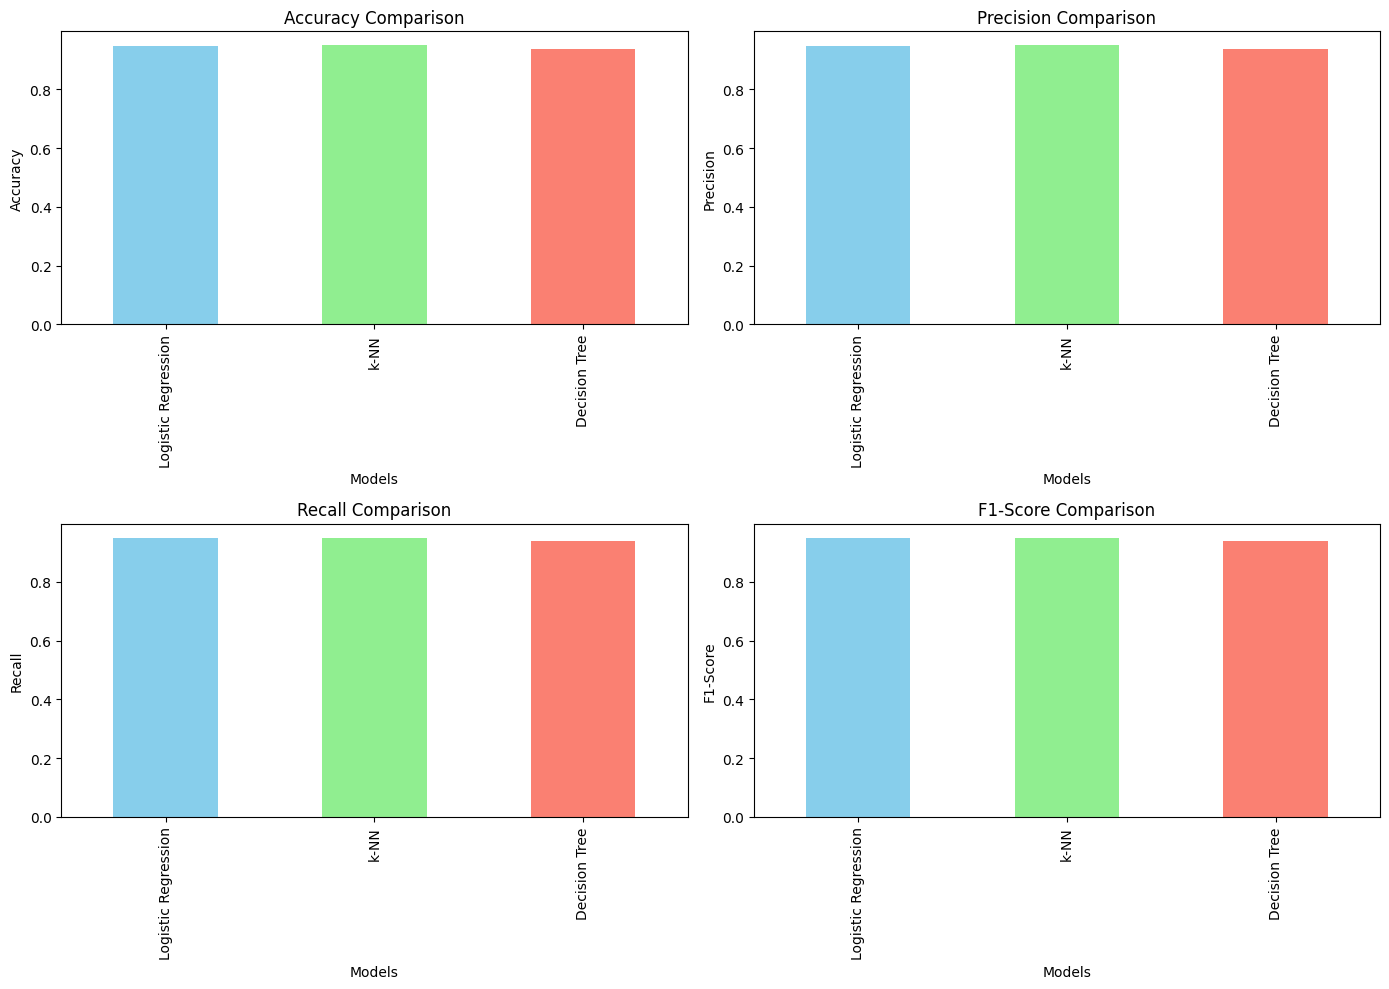

In [104]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    results_values.loc[metric].plot(kind='bar', ax=ax, color=['skyblue', 'lightgreen', 'salmon'])
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xlabel('Models')

plt.tight_layout()
plt.show()

немного выводов

Accuracy: k-NN показал наибольшую точность (0.950), что немного превосходит результаты Logistic Regression (0.948) и Decision Tree (0.938)

Это означает, что модель k-NN лучше других справляется с общим числом правильных предсказаний

Precision: k-NN снова показал наилучший результат (0.950), что указывает на более высокую точность при классификации положительных примеров по сравнению с другими моделями

Logistic Regression и Decision Tree имеют схожие результаты по точности (0.948 и 0.938 соответственно), что говорит о том, что обе эти модели имеют немного больше ошибочных положительных предсказаний, чем k-NN

Recall: здесь k-NN снова лидирует с результатом (0.950), что означает, что эта модель правильно классифицирует большее количество положительных примеров, чем остальные модели

Logistic Regression и Decision Tree также показывают схожие результаты, но их показатели по полноте немного ниже

F1-Мера: k-NN имеет наибольшую F1-меру (0.950), что говорит о сбалансированном сочетании точности и полноты. Это важно для оценки эффективности модели, особенно при неоднородных данных

Logistic Regression и Decision Tree имеют несколько более низкие значения F1-метрики, что указывает на возможный компромисс между точностью и полнотой


итог!
k-NN является наиболее сбалансированной и эффективной моделью среди трёх, показывая лучшие результаты по всем метрикам

In [105]:
import re
import string
import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [106]:
dp = pd.read_csv("sentiment_data.csv")
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15000 non-null  int64 
 1   text        15000 non-null  object
 2   sentiment   15000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 351.7+ KB


In [107]:
dp

,Unnamed: 0,text,sentiment
0,0,Неспешные снимки\nЗапись на снимок возможна на...,1
1,1,"Все просто замечательно, минус только один - о...",0
2,2,В кафе приятненько . Часто заказываем пиццу н...,0
3,3,Халатное отношение\nВызвали сегодня скорую в О...,1
4,4,цель поездки деловая и соответственно отель вы...,0
...,...,...,...
14995,14995,"Большой отель, и дорогой для Берлина. При том ...",0
14996,14996,"ост, я вижу, не подзамочный. Можно ссылаться? ...",0
14997,14997,Долгое выполнение анализов\nДелали анализ кров...,1
14998,14998,"Останавливались в отеле на одну ночь, хотя спо...",1


In [108]:
dp.columns

Index(['Unnamed: 0', 'text', 'sentiment'], dtype='object')

удалим этот столбец

In [109]:
dp = dp.drop(columns=['Unnamed: 0'])

In [110]:
dp

,text,sentiment
0,Неспешные снимки\nЗапись на снимок возможна на...,1
1,"Все просто замечательно, минус только один - о...",0
2,В кафе приятненько . Часто заказываем пиццу н...,0
3,Халатное отношение\nВызвали сегодня скорую в О...,1
4,цель поездки деловая и соответственно отель вы...,0
...,...,...
14995,"Большой отель, и дорогой для Берлина. При том ...",0
14996,"ост, я вижу, не подзамочный. Можно ссылаться? ...",0
14997,Долгое выполнение анализов\nДелали анализ кров...,1
14998,"Останавливались в отеле на одну ночь, хотя спо...",1


##предобрабатываем всяческими способами

список стоп слов и лемматизатор

In [111]:
m = Mystem()
nltk.download('stopwords')
stop_words = list(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
def preprocess_text(text):
    text = text.lower()  #приводим к нижнему регистру
    text = ''.join([char for char in text if char not in string.punctuation])  #убираем пунктуацию
    text = ' '.join([word for word in text.split() if word not in stop_words])  #убираем стоп-слова
    return text

In [113]:
def lemmatize_text_mystem(text):
    return ' '.join(m.lemmatize(text))

In [114]:
dp['cleaned_text'] = dp['text'].apply(preprocess_text)
dp['super_text'] = dp['cleaned_text'].apply(lemmatize_text_mystem)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(dp['super_text'], dp['sentiment'], test_size=0.2, random_state=42)

In [116]:
tfidp_vectorizer = TfidfVectorizer(max_features=5000)
x_train_vectorized = tfidp_vectorizer.fit_transform(X_train)
x_test_vectorized = tfidp_vectorizer.transform(X_test)

In [117]:
mnb = MultinomialNB()
model.fit(x_train_vectorized, y_train)
y_pred = model.predict(x_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1476
           1       0.72      0.80      0.76      1524

    accuracy                           0.74      3000
   macro avg       0.75      0.74      0.74      3000
weighted avg       0.75      0.74      0.74      3000

